# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

# Import Statements

In [413]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [414]:
colors_df = pd.read_csv('data\colors.csv', header=0)
colors_df

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
211,1085,Two-tone Silver,737271,f
212,1086,Pearl Lime,6A7944,f
213,1087,Duplo Pink,FF879C,f
214,1088,Medium Brown,755945,f


**NUnique**: The purpose of the two solutions below is to show how you can use the .nunique() method to find the number of unique values in a column. Their are two ways to do this:

In [415]:
colors_df.name.nunique()

216

In [416]:
colors_df['name'].nunique()

216

**Transparent**: Using the <code>is_trans == 't'</code> and <code>is_trans == 'f'</code> we are able to groupby if the lego piece is transparent.

In [417]:
colors_df.groupby('is_trans').count() 

,id,name,rgb
is_trans,,,
f,178,178,178
t,38,38,38


In [418]:
colors_df.is_trans.value_counts()

f    178
t     38
Name: is_trans, dtype: int64

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include **Star Wars**, Batman, Harry Potter, and many more. All current themes can be viewed at [Lego.com/en-us/themes](https://www.lego.com/en-us/themes).

<img src="assets\lego_themes.png">
<img src="assets\lego_themes_2.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="assets\lego_sets.png">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [419]:
sets_df = pd.read_csv('data\sets.csv', header=0)
sets_df

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1979,67,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
19134,XWING-1,Mini X-Wing Fighter,2019,158,60
19135,XWING-2,X-Wing Trench Run,2019,158,52
19136,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413
19137,YTERRIER-1,Yorkshire Terrier,2018,598,0


**Fun Fact**: The first set was released in the year 1949. Check out the [Lego Wiki](https://en.wikipedia.org/wiki/Lego).

In [420]:
sets_by_year = sets_df.groupby('year').count()
sets_by_year['set_num'].head()

year
1949     5
1950     6
1953     4
1954    14
1955    29
Name: set_num, dtype: int64

In [421]:
sets_by_year['set_num'].tail()

year
2018     872
2019     935
2020     935
2021    1076
2022     499
Name: set_num, dtype: int64

**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [422]:
sets_df.sort_values('year').head()

,set_num,name,year,theme_id,num_parts
11411,700.3-1,Medium Gift Set (ABB),1949,365,142
11406,700.2-1,Large Gift Set (ABB),1949,365,178
11393,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
11417,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
11416,700.A-1,Small Brick Set (ABB),1949,371,24


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [423]:
sets_df[sets_df['year'] == 1949]

,set_num,name,year,theme_id,num_parts
11393,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
11406,700.2-1,Large Gift Set (ABB),1949,365,178
11411,700.3-1,Medium Gift Set (ABB),1949,365,142
11416,700.A-1,Small Brick Set (ABB),1949,371,24
11417,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [424]:
sets_df.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
3994,31203-1,World Map,2021,709,11695
18086,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
370,10294-1,Titanic,2021,673,9092
351,10276-1,Colosseum,2020,673,9036
13255,75192-1,Millennium Falcon,2017,171,7541


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [425]:
sets_by_year = sets_df.groupby('year').count()
sets_by_year['set_num'].head()

year
1949     5
1950     6
1953     4
1954    14
1955    29
Name: set_num, dtype: int64

In [426]:
sets_by_year['set_num'].tail()

year
2018     872
2019     935
2020     935
2021    1076
2022     499
Name: set_num, dtype: int64

**Number of Parts**: Scatter plot of the number of parts in each set sorted by year.

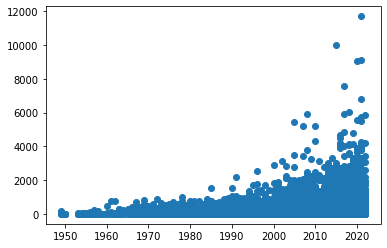

In [427]:
plt.scatter(sets_df.year, sets_df.num_parts)

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from mid 2022, so to plot the full calendar years, we will have to exclude some data from your chart.

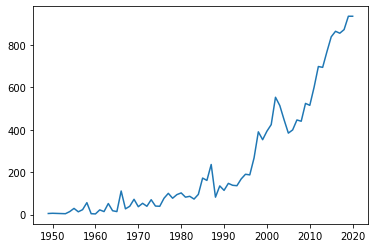

In [428]:
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [429]:
themes_by_year = sets_df.groupby('year').agg({'theme_id': pd.Series.nunique})
themes_by_year.rename(columns={'theme_id': 'nr_themes'}, inplace=True)
themes_by_year

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2018,89
2019,76
2020,85


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2022). 

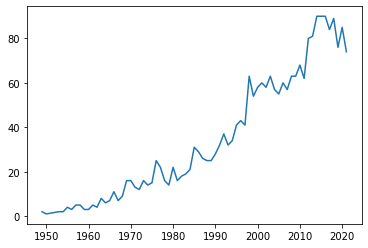

In [430]:
plt.plot(themes_by_year.index[:-1], themes_by_year.nr_themes[:-1])

### Line Charts with Two Seperate Axes

Text(0, 0.5, 'Number of Themes')

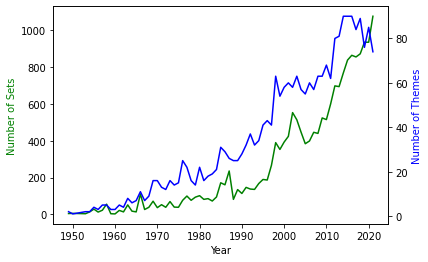

In [431]:
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(sets_by_year.index[:-1], sets_by_year.set_num[:-1], color='g')
ax2.plot(themes_by_year.index[:-1], themes_by_year.nr_themes[:-1], color='b')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets', color='green')
ax2.set_ylabel('Number of Themes', color='blue')

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [432]:
parts_per_set = sets_df.groupby('year').agg({'num_parts': pd.Series.mean})
parts_per_set

,num_parts
year,
1949,99.600000
1950,1.000000
1953,12.500000
1954,8.357143
1955,15.758621
...,...
2018,196.975917
2019,204.879144
2020,226.717647


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

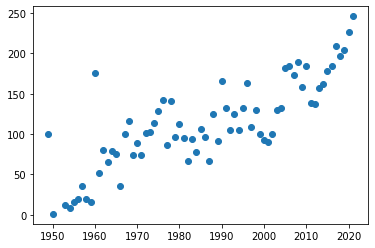

In [433]:
plt.scatter(parts_per_set.index[:-1], parts_per_set.num_parts[:-1])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [434]:
sets_theme_count = sets_df["theme_id"].value_counts()
sets_theme_count[:5]

501    2053
158     823
503     601
494     486
497     471
Name: theme_id, dtype: int64

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png


<img src="assets\rebrickable_schema.png">

**Additional/Custom Table**: Table created for name to set_num mapping for what sets are owned. With the relation other mappings can be added. Table is below and maps to the sets.csv and uses the set_num as the primary key.

* **owned**, name of the table
* set_num, the set number which links back to the sets table
* name, the name of the builder/owner
* built, has the set been built? (t or f)
* streamed, was the build live streamed? (t or f)

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [435]:
themes = pd.read_csv('data/themes.csv', header=0)
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0


In [436]:
themes[themes.name == 'Star Wars']

,id,name,parent_id
5,18,Star Wars,1.0
78,158,Star Wars,NaN
100,209,Star Wars,207.0
130,261,Star Wars,258.0


In [437]:
themes[themes.id == 171]

,id,name,parent_id
79,171,Ultimate Collector Series,158.0


In [438]:
themes[themes.parent_id == 158]

,id,name,parent_id
79,171,Ultimate Collector Series,158.0


In [439]:
sets_df[sets_df.theme_id == 171]

,set_num,name,year,theme_id,num_parts
117,10018-1,Darth Maul,2001,171,1868
118,10019-1,Rebel Blockade Runner,2001,171,1748
127,10026-1,Naboo Starfighter,2002,171,188
130,10030-1,Imperial Star Destroyer,2002,171,3116
193,10123-1,Cloud City,2003,171,707
197,10129-1,Rebel Snowspeeder,2003,171,1457
200,10131-1,TIE Fighter Collection,2004,171,685
203,10134-1,Y-wing Attack Starfighter,2004,171,1490
207,10143-1,Death Star II,2005,171,3461
208,10144-1,Sandcrawler,2005,171,1682


In [440]:
sets_df[sets_df.set_num == '75308-1']

,set_num,name,year,theme_id,num_parts
13380,75308-1,R2-D2,2021,158,2314


In [441]:
sets_df[sets_df.theme_id == 158]

,set_num,name,year,theme_id,num_parts
1989,20006-1,Clone Turbo Tank,2008,158,64
2000,20007-1,Republic Attack Cruiser,2009,158,84
2012,20009-1,AT-TE Walker,2009,158,94
2014,20010-1,Republic Gunship,2009,158,94
2020,20016-1,Imperial Shuttle,2010,158,70
...,...,...,...,...,...
19097,VP-4,Star Wars Co-Pack,2000,158,0
19100,VP-8,Star Wars Co-Pack,2000,158,0
19134,XWING-1,Mini X-Wing Fighter,2019,158,60
19135,XWING-2,X-Wing Trench Run,2019,158,52


### Merging (i.e., Combining) DataFrames based on a Key


In [442]:
themes_merge = themes.copy()
themes_merge.rename(columns={'id': 'theme_id'}, inplace=True)
sets_themes_df = pd.merge(sets_df, themes_merge, on='theme_id')
sets_themes_df.rename(columns={'name_x': 'set_name'}, inplace=True)
sets_themes_df.rename(columns={'name_y': 'theme_name'}, inplace=True)
sets_themes_df.tail()

,set_num,set_name,year,theme_id,num_parts,theme_name,parent_id
19134,M20-2566-10,Modulex Box - 10x Window 1 x 6 x 6,1963,716,10,Modulex,NaN
19135,M20-2575-10,Modulex Box - 10x Window 1 x 7 x 5,1963,716,10,Modulex,NaN
19136,M20-2576-10,Modulex Box - 10x Window 1 x 7 x 6,1963,716,10,Modulex,NaN
19137,M20-2586-10,Modulex Box - 10x Window 1 x 8 x 6,1963,716,10,Modulex,NaN
19138,WEETABIX1-1,Weetabix Castle,1970,414,471,Castle,411.0


### Analytics related to n0nder's sets.

<img src='assets/background.jpg'>

### n0nder's displayed sets:

|Row            |1                                              |2                              |3                          |4                          |5
|---            |---                                            |---                            |---                        |---                        |---
|**Top Row**    |A-Wing Starfighter (75275)                     |X-Wing Starfighter (75218)?    |Unknown                    |Unknown                    |Unknown
|**2nd Row**    |The Child (75318)                              |Imperial Probe Droid(75306)    |BB-8(75187)?               |Unknown
|**3rd Row**    |Boba Fett (75277)                              |Unknown                        |Unknown                    |The Razor Crest (75292)?
|**Bottom Row** |Slave I - 20th Anniversary Edition (75243)?    |R2-D2 (75308)                  |
Millennium Falcon (75192)  |TIE Figher (75095)?

**Questions to answer**:
* How many sets does n0nder own/have on display?
* How many total pieces does n0nder own/have on display?
* Chart of owned sets by year?
* How many sets has n0nder built on stream?
* How much time has been spent building sets?

**Explanation of Parts per minutes speed calulation**:

It seems that a typical build time is around 2.5 - 7.5 PPM or 150 - 450 parts per hour. For time calculations the time is calculated at 6 PPM. This doesn't account for critical errors where a tear down is required.

The Darth Vader build has 834 pieces and the build portion of n0nder's stream was approximately 3.25 hours. With the estimated 3.25 hours to build, it came out to a speed of about 4.25 PPM while streaming. While not streaming a calculation of 6 PPM would be more accurate. This calulations will be used later for estimated build times and time based data.

In [443]:
n0nder_parts_per_minute = 834 / 3.25 / 60
n0nder_parts_per_minute

4.276923076923078

### Troy's Sets:

**Questions to answer**:
* How many sets does Troy own?
* How many total pieces does Troy own?
* Chart of owned sets by year?
* How much time has been spent building build sets?
    * Each set and total?

In [444]:
owned_df = pd.read_csv('data/owned.csv', header=0)
owned_df.head()

,set_num,name,built,streamed,displayed,comments
0,75308-1,troy,T,NaN,NaN,NaN
1,75318-1,troy,T,NaN,NaN,NaN
2,75304-1,troy,T,NaN,NaN,NaN
3,75305-1,troy,T,NaN,NaN,NaN
4,75306-1,troy,T,NaN,NaN,NaN


In [445]:
# Hows many sets are owned by each user? With only values where 't'.
owned_df.groupby('name').count()

,set_num,built,streamed,displayed,comments
name,,,,,
n0nder,12,12,2,12,5
troy,17,11,0,0,0


In [446]:
# Merge the sets and owned dataframes.
sets_owned_df = pd.merge(owned_df, sets_themes_df, on='set_num')
sets_owned_df.head()

,set_num,name,built,streamed,displayed,comments,set_name,year,theme_id,num_parts,theme_name,parent_id
0,75308-1,troy,T,NaN,NaN,NaN,R2-D2,2021,158,2314,Star Wars,NaN
1,75308-1,n0nder,T,T,T,NaN,R2-D2,2021,158,2314,Star Wars,NaN
2,75318-1,troy,T,NaN,NaN,NaN,The Child,2020,158,1073,Star Wars,NaN
3,75318-1,n0nder,T,NaN,T,NaN,The Child,2020,158,1073,Star Wars,NaN
4,75304-1,troy,T,NaN,NaN,NaN,Darth Vader,2021,158,834,Star Wars,NaN


In [447]:
sets_owned_df.drop(['set_num', 'streamed', 'displayed', 'comments', 'year', 'theme_id', 'theme_name', 'parent_id'], axis=1, inplace=True)
sets_owned_df.head()

,name,built,set_name,num_parts
0,troy,T,R2-D2,2314
1,n0nder,T,R2-D2,2314
2,troy,T,The Child,1073
3,n0nder,T,The Child,1073
4,troy,T,Darth Vader,834


In [448]:
sets_owned_df.groupby('name').agg({'num_parts': pd.Series.sum})

,num_parts
name,
n0nder,20303
troy,20002


In [449]:
# How much time will it take to build all sets as new column?
sets_owned_df['minutes_to_build'] = round(sets_owned_df['num_parts'] / n0nder_parts_per_minute, 0)
sets_owned_df['hours_to_build'] = round(sets_owned_df['minutes_to_build'] / 60, 2)
sets_owned_df.head()

,name,built,set_name,num_parts,minutes_to_build,hours_to_build
0,troy,T,R2-D2,2314,541.0,9.02
1,n0nder,T,R2-D2,2314,541.0,9.02
2,troy,T,The Child,1073,251.0,4.18
3,n0nder,T,The Child,1073,251.0,4.18
4,troy,T,Darth Vader,834,195.0,3.25
